<a href="https://colab.research.google.com/github/zahra-zarrabi/RNN/blob/main/GRU_vs_RNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRU

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
N = 3000
t = np.arange(0, N)

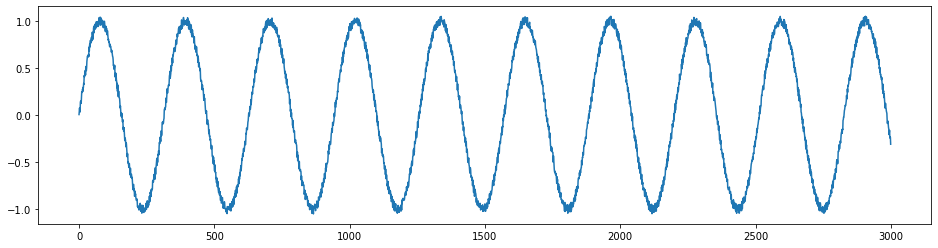

In [3]:
data_sin = np.sin(0.02*t) + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_sin)
plt.show()

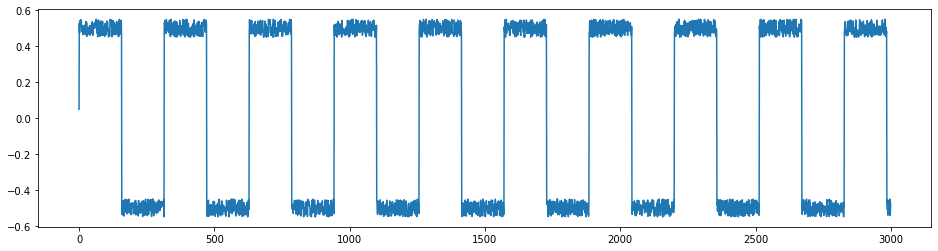

In [4]:
data_square = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_square)
plt.show()

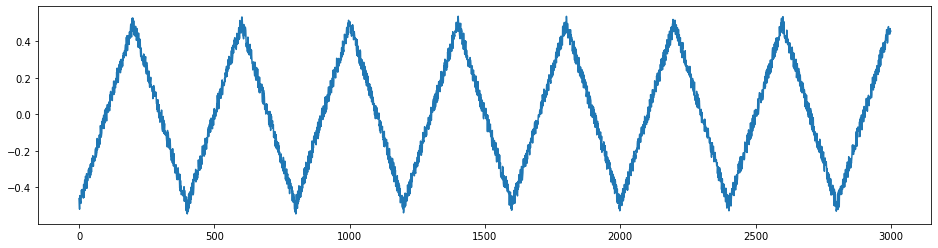

In [5]:
p=200
A=2
data_triangle = ((A/p)*(p-np.abs(t%(2*p)-p))-1)/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_triangle)
plt.show()

In [6]:
def convertToDataset(signal, step,label):
  X = []
  Y = []
  for i in range(len(signal)-step):
    j = i+step
    X.append(signal[i:j])
    Y.append(label)
  return np.array(X), np.array(Y)

In [7]:
x_sine, y_sine = convertToDataset(data_sin, 40,0)
x_square, y_square = convertToDataset(data_square, 40, 1)
x_triangle, y_triangle = convertToDataset(data_triangle, 40, 2)

In [8]:
y_sine.shape

(2960,)

In [9]:
x = np.concatenate((x_sine,x_square,x_triangle))
y = np.concatenate((y_sine,y_square,y_triangle))

x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.2)

In [10]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [11]:
x_train.shape

(7104, 40, 1)

In [12]:
model = tf.keras.models.Sequential([
   layers.GRU(units=64, input_shape=(None, 1)),
   layers.Dense(3, activation='softmax')
])


In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=30 ,batch_size=16)

Epoch 1/30
444/444 [==============================] - 7s 11ms/step - loss: 0.7258 - accuracy: 0.6829
Epoch 2/30
444/444 [==============================] - 5s 11ms/step - loss: 0.4359 - accuracy: 0.8508
Epoch 3/30
444/444 [==============================] - 5s 11ms/step - loss: 0.3118 - accuracy: 0.8877
Epoch 4/30
444/444 [==============================] - 5s 11ms/step - loss: 0.8382 - accuracy: 0.7390
Epoch 5/30
444/444 [==============================] - 5s 11ms/step - loss: 0.6328 - accuracy: 0.7652
Epoch 6/30
444/444 [==============================] - 5s 11ms/step - loss: 0.5601 - accuracy: 0.7903
Epoch 7/30
444/444 [==============================] - 5s 11ms/step - loss: 0.3363 - accuracy: 0.8887
Epoch 8/30
444/444 [==============================] - 6s 13ms/step - loss: 0.4775 - accuracy: 0.8522
Epoch 9/30
444/444 [==============================] - 5s 12ms/step - loss: 0.2375 - accuracy: 0.9131
Epoch 10/30
444/444 [==============================] - 5s 11ms/step - loss: 0.2226 - accura

In [18]:
model.evaluate(x_test,y_test)

56/56 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 1.0000


[0.011112945154309273, 1.0]

# RNN

In [19]:
model = tf.keras.models.Sequential([
   layers.SimpleRNN(units=64),
   layers.Dense(3, activation='softmax')
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=30 ,batch_size=16)

Epoch 1/30
444/444 [==============================] - 15s 31ms/step - loss: 0.7511 - accuracy: 0.6571
Epoch 2/30
444/444 [==============================] - 14s 31ms/step - loss: 0.4385 - accuracy: 0.8369
Epoch 3/30
444/444 [==============================] - 14s 31ms/step - loss: 0.2542 - accuracy: 0.9157
Epoch 4/30
444/444 [==============================] - 13s 29ms/step - loss: 0.1578 - accuracy: 0.9509
Epoch 5/30
444/444 [==============================] - 13s 29ms/step - loss: 0.0987 - accuracy: 0.9713
Epoch 6/30
444/444 [==============================] - 13s 29ms/step - loss: 0.0833 - accuracy: 0.9766
Epoch 7/30
444/444 [==============================] - 13s 30ms/step - loss: 0.0587 - accuracy: 0.9855
Epoch 8/30
444/444 [==============================] - 13s 30ms/step - loss: 0.3720 - accuracy: 0.8702
Epoch 9/30
444/444 [==============================] - 13s 30ms/step - loss: 1.0821 - accuracy: 0.4237
Epoch 10/30
444/444 [==============================] - 13s 30ms/step - loss: 1.022

In [22]:
model.evaluate(x_test,y_test)

56/56 [==============================] - 1s 9ms/step - loss: 0.0367 - accuracy: 0.9916


[0.03667593374848366, 0.9915540814399719]